In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patches as mpatches
# from matplotlib_venn import venn3, venn3_circles
from sklearn import preprocessing
from sklearn import svm
from sklearn.cluster import KMeans
%matplotlib inline

In [5]:
# filename = 'samples.csv'
filename = 'allCases.csv'
pdData = pd.read_csv( filename )
pdData.head()

,GI_10047091-S,GI_10047093-S,GI_10047103-S,GI_10047133-A,GI_10092596-S,GI_10092600-S,GI_10092616-S,GI_10092618-S,GI_10092672-S,GI_10190705-S,...,GI_9257224-S,GI_9257226-S,GI_9257237-S,GI_9257239-A,GI_9257241-S,GI_9257243-S,GI_9257244-A,GI_9257245-I,GI_9257247-S,Classes
0,0.45913,0.037793,-0.005021,0.39648,0.29401,0.26444,0.435410,-0.53531,0.16046,-0.19291,...,-0.37553,-0.512370,0.240620,-0.030798,0.22241,-0.003962,0.357550,0.22980,-0.022661,-1
1,-1.98480,-0.142290,0.076412,-0.46900,-0.16588,0.42238,-0.248210,1.01870,-0.34881,0.31184,...,1.48960,0.039887,-0.444670,-0.648190,-0.23605,0.097790,0.434900,0.52060,-0.003774,-1
2,1.00490,0.425740,-0.099454,-0.17077,-0.73145,-0.25367,-0.320740,-0.52091,0.54489,-0.38279,...,-0.70933,0.202730,0.147760,0.366220,-0.25603,-0.091443,0.111410,-0.23404,-0.631230,-1
3,0.36231,0.170210,-0.120560,-0.10330,0.41135,-0.30434,-0.326260,-0.91447,0.18123,0.20771,...,-0.98498,-0.160730,-0.066951,0.096363,0.27887,0.026118,-0.002167,-0.12377,-0.103870,-1
4,-1.50340,-0.474720,0.193410,-0.46900,-0.34593,0.61051,-0.066067,0.44141,-0.35778,0.73950,...,1.24010,1.094100,-0.156190,-0.416930,-1.04500,-0.023955,0.419680,-0.10964,0.438730,-1


In [6]:
pdData["Classes"] = pdData["Classes"].replace([-1,1], [0,1])
pdData.head()

,GI_10047091-S,GI_10047093-S,GI_10047103-S,GI_10047133-A,GI_10092596-S,GI_10092600-S,GI_10092616-S,GI_10092618-S,GI_10092672-S,GI_10190705-S,...,GI_9257224-S,GI_9257226-S,GI_9257237-S,GI_9257239-A,GI_9257241-S,GI_9257243-S,GI_9257244-A,GI_9257245-I,GI_9257247-S,Classes
0,0.45913,0.037793,-0.005021,0.39648,0.29401,0.26444,0.435410,-0.53531,0.16046,-0.19291,...,-0.37553,-0.512370,0.240620,-0.030798,0.22241,-0.003962,0.357550,0.22980,-0.022661,0
1,-1.98480,-0.142290,0.076412,-0.46900,-0.16588,0.42238,-0.248210,1.01870,-0.34881,0.31184,...,1.48960,0.039887,-0.444670,-0.648190,-0.23605,0.097790,0.434900,0.52060,-0.003774,0
2,1.00490,0.425740,-0.099454,-0.17077,-0.73145,-0.25367,-0.320740,-0.52091,0.54489,-0.38279,...,-0.70933,0.202730,0.147760,0.366220,-0.25603,-0.091443,0.111410,-0.23404,-0.631230,0
3,0.36231,0.170210,-0.120560,-0.10330,0.41135,-0.30434,-0.326260,-0.91447,0.18123,0.20771,...,-0.98498,-0.160730,-0.066951,0.096363,0.27887,0.026118,-0.002167,-0.12377,-0.103870,0
4,-1.50340,-0.474720,0.193410,-0.46900,-0.34593,0.61051,-0.066067,0.44141,-0.35778,0.73950,...,1.24010,1.094100,-0.156190,-0.416930,-1.04500,-0.023955,0.419680,-0.10964,0.438730,0


In [42]:
pdData["Classes"].value_counts()

1    188
0    176
Name: Classes, dtype: int64

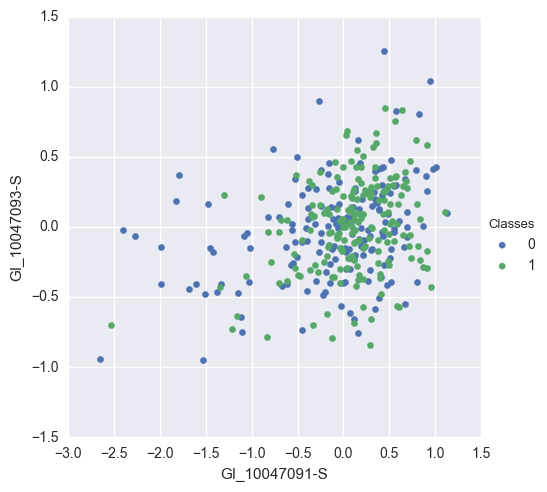

In [43]:
sns.FacetGrid(pdData, hue="Classes", size=5) \
   .map(plt.scatter, "GI_10047091-S", "GI_10047093-S") \
   .add_legend()

In [44]:
# # save the first row as index
# pdColumns = pdData.head(n=0)
# print(pdColumns)

In [7]:
# normalize data
data = pdData.values
data, labels = data[:, :-1], data[:,-1]
number_sample, number_features = len(labels), len(data[0])
# data = preprocessing.normalize(data, norm='l2')
# print( data )
# print(number_sample, number_features)

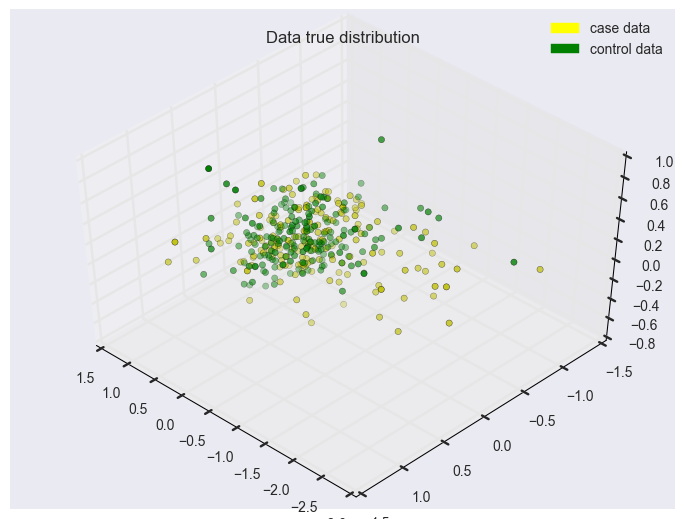

In [36]:
# plot true result
fig = plt.figure(figsize=(7, 5))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
plot_true_labels = np.array(labels).tolist()
for i in range(len(plot_true_labels)):
    if plot_true_labels[i] == 0:
        plot_true_labels[i] = 'y'
    else:
        plot_true_labels[i] = 'g'
# print(plot_labels)
ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=plot_true_labels)

# ax.w_xaxis.set_ticklabels([])
# ax.w_yaxis.set_ticklabels([])
# ax.w_zaxis.set_ticklabels([])
# ax.set_xlabel('feature 1')
# ax.set_ylabel('feature 2')
# ax.set_zlabel('feature 3')

yellow_patch = mpatches.Patch(color='yellow', label='case data')
green_patch = mpatches.Patch(color='green', label='control data')
plt.legend(handles=[yellow_patch, green_patch])
plt.title("Data true distribution")
plt.show()

In [9]:
# train hierarchical clustering - bottom up
X, y = data, labels
model_bu = AgglomerativeClustering(linkage="average", affinity="cosine")
predictions = model_bu.fit_predict( X )
print(labels.astype(int))
print(predictions)

# find the difference ind of bottom up and record the amount
diff_bu = (labels==predictions).astype(int)
correct_rate_bu = sum(diff_bu)/len(diff_bu)
uncorrect_rate_bu = 1 - correct_rate_bu
print('diff_bu: ', diff_bu)
print("correct_rate_bu: ",correct_rate_bu, sum(diff_bu))
print("uncorrect_rate_bu: ", uncorrect_rate_bu, len(diff_bu)-sum(diff_bu))
mis_index = [i for i, c in enumerate(diff_bu) if c == 0]
print( "mis_index :", mis_index )

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[1 0 1 1 0 1 1 1 1 0 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0
 1 0 1 1 0 0 0 1 1 1 0 0 0 1 1 1 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 1 1 0 1 1
 1 0 1 0 1 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 1 0 1 1 1 1 0 0 1 1 1 1 0 1 1
 1 1 0 1 0 1 1 1 0 1 0 0 0 1 0 0 0 0

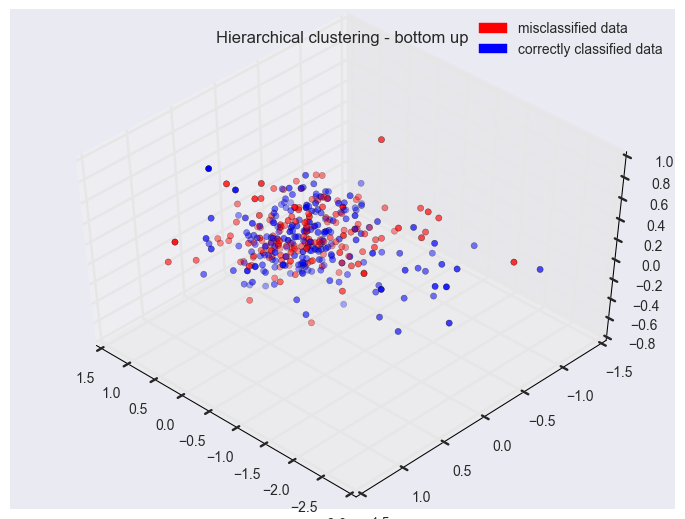

In [35]:
# plot predict result
fig = plt.figure(figsize=(7, 5))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
plot_labels_ud = np.array(diff_bu).tolist()
for i in range(len(plot_labels_ud)):
    if plot_labels_ud[i] == 0:
        plot_labels_ud[i] = 'r'
    else:
        plot_labels_ud[i] = 'b'
# print(plot_labels)
ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=plot_labels_ud)

# ax.w_xaxis.set_ticklabels([])
# ax.w_yaxis.set_ticklabels([])
# ax.w_zaxis.set_ticklabels([])
# ax.set_xlabel('feature 1')
# ax.set_ylabel('feature 2')
# ax.set_zlabel('feature 3')

red_patch = mpatches.Patch(color='red', label='misclassified data')
blue_patch = mpatches.Patch(color='blue', label='correctly classified data')
plt.legend(handles=[red_patch, blue_patch])
plt.title("Hierarchical clustering - bottom up")
plt.show()

In [11]:
# train hierarchical clustering - kmeans - top down
X2, y2 = data, labels.astype(int)
model_kmeans = KMeans(n_clusters=2).fit(X2)
predictions3 = model_kmeans.labels_
print(labels.astype(int))
print(predictions3)

# anlyze the difference with true data
diff_kmeans = (labels==predictions3).astype(int)
uncorrect_rate_kmeans = sum(diff_kmeans)/len(diff_kmeans)
correct_rate_kmeans = 1 - uncorrect_rate_kmeans
print("correct_rate_kmeans: ",uncorrect_rate_kmeans, sum(diff_kmeans))
print("uncorrect_rate_kmeans: ", correct_rate_kmeans, len(diff_kmeans)-sum(diff_kmeans))
mis_index_kmeans = [i for i, c in enumerate(diff_kmeans) if c == 0]
print( "mis_index_kmeans :", mis_index_kmeans )

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[1 0 1 1 0 1 1 1 1 0 0 0 0 1 1 1 1 0 0 0 1 1 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0
 1 0 1 1 0 0 0 1 1 1 0 0 0 1 1 1 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 1 1 0 1 1
 0 0 1 0 1 1 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 1 1 0 1 1 1 1 0 0 1 1 1 1 0 1 1
 1 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0

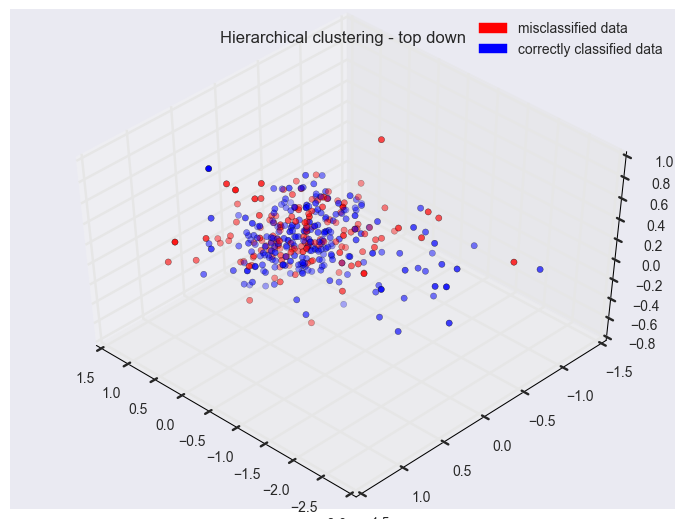

In [34]:
# plot predict result
fig = plt.figure(figsize=(7, 5))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
plot_labels_kmeans = np.array(diff_kmeans).tolist()
for i in range(len(plot_labels_kmeans)):
    if plot_labels_kmeans[i] == 0:
        plot_labels_kmeans[i] = 'r'
    else:
        plot_labels_kmeans[i] = 'b'
# print(plot_labels)
ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=plot_labels_kmeans)

# ax.w_xaxis.set_ticklabels([])
# ax.w_yaxis.set_ticklabels([])
# ax.w_zaxis.set_ticklabels([])
# ax.set_xlabel('feature 1')
# ax.set_ylabel('feature 2')
# ax.set_zlabel('feature 3')

red_patch = mpatches.Patch(color='red', label='misclassified data')
blue_patch = mpatches.Patch(color='blue', label='correctly classified data')
plt.legend(handles=[red_patch, blue_patch])
plt.title("Hierarchical clustering - top down")
plt.show()

In [13]:
common_mis = [ i for i in mis_index_kmeans if i in mis_index]
print("common_misclassified: ", common_mis)
print("sum of common mis:", len(common_mis))

common_misclassified:  [0, 2, 3, 5, 6, 7, 8, 13, 14, 15, 16, 20, 26, 28, 29, 37, 39, 40, 44, 45, 46, 50, 51, 52, 57, 58, 59, 61, 69, 70, 72, 73, 76, 78, 79, 86, 88, 90, 95, 96, 98, 99, 100, 101, 104, 105, 106, 107, 109, 110, 111, 112, 114, 116, 118, 120, 124, 130, 131, 132, 137, 138, 141, 143, 145, 148, 149, 152, 157, 163, 164, 173, 175, 180, 182, 185, 189, 193, 194, 195, 196, 201, 204, 207, 215, 225, 228, 229, 232, 233, 235, 236, 238, 250, 251, 259, 261, 262, 265, 268, 269, 273, 278, 279, 281, 284, 285, 295, 300, 301, 302, 307, 319, 323, 326, 332, 333, 335, 338, 340, 341, 342, 343, 345, 349, 354, 355, 356, 357, 358, 363]
sum of common mis: 131


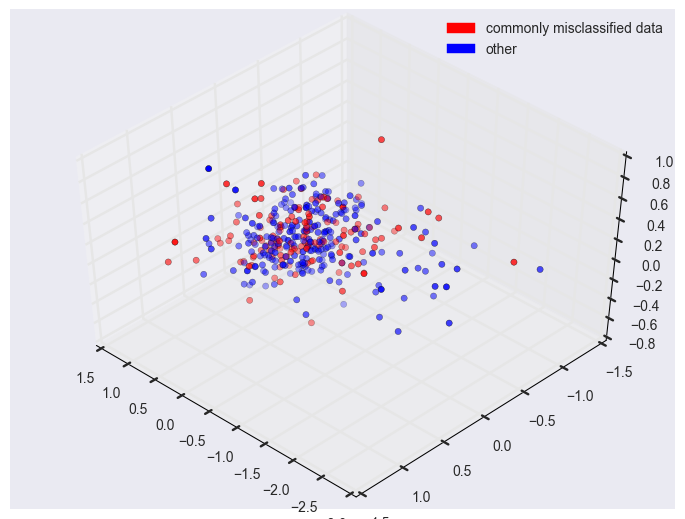

In [42]:
# plot common misclassified
plot_common_mis_ud_kmeans = [0 for _ in range(len(labels))]
for i in common_mis:
    plot_common_mis_ud_kmeans[i] = 1

fig = plt.figure(figsize=(7, 5))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
plot_labels = np.array(plot_common_mis_ud_kmeans).tolist()
for i in range(len(plot_labels)):
    if plot_labels[i] == 0:
        plot_labels[i] = 'b'
    else:
        plot_labels[i] = 'r'
# print(plot_labels)
ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=plot_labels)

# ax.w_xaxis.set_ticklabels([])
# ax.w_yaxis.set_ticklabels([])
# ax.w_zaxis.set_ticklabels([])
# ax.set_xlabel('feature 1')
# ax.set_ylabel('feature 2')
# ax.set_zlabel('feature 3')

red_patch = mpatches.Patch(color='red', label='commonly misclassified data')
blue_patch = mpatches.Patch(color='blue', label='other')
plt.legend(handles=[red_patch, blue_patch])
# plt.margins(0.5)
# plt.subplots_adjust(bottom=0.5)
plt.show()

In [15]:
# train second level kmeans
label21 = []
label22 = []
cluster21 = []
cluster22 = []
ind21 = []
ind22 = []
for ind, pred in enumerate(predictions3):
    if pred == 0:
        label21.append( labels[ind] )
        cluster21.append( data[ind] )
        ind21.append( ind )
    else:
        label22.append( labels[ind] )
        cluster22.append( data[ind] )
        ind22.append( ind )
label21 = np.array( label21 )
label22 = np.array( label22 )
cluster21 = np.array( cluster21 )
cluster22 = np.array( cluster22 )
print(label21.shape, cluster21.shape)
print(label22.shape, cluster22.shape)

(159,) (159, 8560)
(205,) (205, 8560)


In [21]:
# run kmeans on level 21
X21, y21 = cluster21, label21.astype(int)
model_kmeans_level21 = KMeans(n_clusters=2).fit(X21)
predictions_kmeans_level21 = model_kmeans_level21.labels_
print(label21.astype(int))
print(predictions_kmeans_level21)

# count kmeans on level 2 cluster 1
diff_kmeans_level21 = (label21!=predictions_kmeans_level21).astype(int)
basic_rate_21 = sum(diff_kmeans_level21)/len(diff_kmeans_level21)
basic_amount_21 = sum(diff_kmeans_level21)
correct_rate_kmeans_level21 = max( basic_rate_21, 1 - basic_rate_21  )
uncorrect_rate_kmeans_level21 = 1 - correct_rate_kmeans_level21
correct_amount_21 = max(basic_amount_21, len(diff_kmeans_level21)-basic_amount_21)
uncorrect_amount_21 = len(diff_kmeans_level21) - correct_amount_21
print("correct_rate_kmeans_level21: ",correct_rate_kmeans_level21)
print("correct_amount_21 :", correct_amount_21)
print("uncorrect_rate_kmeans_level21: ", uncorrect_rate_kmeans_level21)
print("uncorrect_amount_21 :", uncorrect_amount_21)
mis_index_kmeans_level21 = [i for i, c in enumerate(diff_kmeans_level21) if c == 0]
print( "mis_index_kmeans_level21 :", mis_index_kmeans_level21 )

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 1 0 1 1 1 1 0 0 0 0 1 1 0 0 0 1 0 1 1 1 1 1 1 0 1 0 0 0 1 1 0 0 1 1
 0 1 1 1 0 1 1 1 1 0 1 1 1 1 0 0 0 1 1 0 1 0 0 1 1 1 0 1 0 1 0 1 0 1 0 1 1
 1 0 1 0 0 0 1 1 1 0 1 1 1 0 1 0 0 0 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 0 0 0
 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 0 0 1 1
 1 0 1 0 1 1 1 0 0 1 1]
correct_rate_kmeans_level21:  0.534591194969
correct_amount_21 : 85
uncorrect_rate_kmeans_level21:  0.465408805031
uncorrect_amount_21 : 74
mis_index_kmeans_level21 : [0, 1, 4, 9, 10, 11, 12, 15, 16, 17, 19, 26, 28, 29, 30, 33, 34, 37, 41, 46, 51, 52, 53, 56, 58, 59, 63, 65, 67, 69, 71, 75, 77, 78, 79, 83, 87, 89, 90, 91, 96, 97, 98, 100, 102, 104, 1

In [23]:
# run kmeans on level 22
X22, y22 = cluster22, label22.astype(int)
model_kmeans_level22 = KMeans(n_clusters=2).fit(X22)
predictions_kmeans_level22 = model_kmeans_level22.labels_
print(label22.astype(int))
print(predictions_kmeans_level22)

# count kmeans on level 2 cluster 2
diff_kmeans_level22 = (label22==predictions_kmeans_level22).astype(int)
basic_rate_22 = sum(diff_kmeans_level22)/len(diff_kmeans_level22)
basic_amount_22 = sum(diff_kmeans_level22)
correct_rate_kmeans_level22 = max( basic_rate_22, 1 - basic_rate_22  )
uncorrect_rate_kmeans_level22 = 1 - correct_rate_kmeans_level22
correct_amount_22 = max(basic_amount_22, len(diff_kmeans_level22)-basic_amount_22)
uncorrect_amount_22 = len(diff_kmeans_level22) - correct_amount_22
print("correct_rate_kmeans_level22: ",correct_rate_kmeans_level22)
print("correct_amount_22 :", correct_amount_22)
print("uncorrect_rate_kmeans_level22: ", uncorrect_rate_kmeans_level22)
print("uncorrect_amount_22 :", uncorrect_amount_22)
mis_index_kmeans_level22 = [i for i, c in enumerate(diff_kmeans_level22) if c == 0]
print( "mis_index_kmeans_level22 :", mis_index_kmeans_level22 )

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 0 1 1 0 1 1 0 1 0 1
 1 1 0 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 0 1 0 1 0 0 1 1 1 1 1 1 0 1
 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 0 1 0 1 1 1 1
 1 1 0 1 1 1 1 0 0 1 1 0 1 0 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1
 0 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 0 0 0 0 1 1 1 0 1 1 1 0 0 0 1 0 1 1
 1 1 0 1 1 0 0 1 0 0 1 1 1 1 0 0 1 1 0 1]
correct_rate_kmeans_level22:  0.536585365854
correct_amount_22 : 110
uncorrect_rate_kmeans_level22:  0.463414634146
uncorrect_amount_22 : 95
mis_index_kmeans_level22 

In [24]:
# analyze kmeans on level 2 
correct_total_level2 = correct_amount_21 + correct_amount_22
uncorrect_total_level2 = uncorrect_amount_21 + uncorrect_amount_22
print("kmeans on level 2 correct amount: ", correct_total_level2)
print("kmeans on level 2 uncorrect amount: ", uncorrect_total_level2)
print("kmeans on level 2 correct rate: ", correct_total_level2/( correct_total_level2 + uncorrect_total_level2 ))

mis_index_kmeans_2 = []
for i in mis_index_kmeans_level21:
    mis_index_kmeans_2.append( ind21[i] )
for i in mis_index_kmeans_level22:
    mis_index_kmeans_2.append( ind22[i] )
print("mis_index_kmeans_2: ", mis_index_kmeans_2)

kmeans on level 2 correct amount:  195
kmeans on level 2 uncorrect amount:  169
kmeans on level 2 correct rate:  0.535714285714
mis_index_kmeans_2:  [1, 4, 11, 22, 23, 24, 27, 32, 33, 34, 36, 49, 54, 55, 56, 63, 64, 67, 75, 83, 91, 92, 94, 103, 113, 115, 122, 125, 127, 129, 135, 144, 147, 150, 151, 158, 162, 166, 167, 168, 180, 182, 185, 193, 195, 201, 204, 207, 208, 229, 232, 233, 235, 236, 238, 250, 255, 259, 261, 265, 268, 269, 273, 279, 281, 282, 284, 285, 300, 301, 302, 314, 319, 323, 325, 326, 338, 340, 341, 343, 349, 354, 355, 358, 363, 0, 5, 8, 13, 15, 16, 21, 25, 26, 28, 37, 39, 40, 44, 46, 51, 52, 57, 59, 61, 70, 72, 76, 79, 86, 88, 93, 96, 98, 100, 101, 105, 106, 107, 109, 110, 111, 112, 114, 116, 124, 131, 133, 141, 142, 143, 145, 148, 149, 155, 163, 173, 174, 175, 183, 184, 191, 203, 210, 212, 214, 222, 230, 231, 239, 241, 243, 245, 246, 248, 257, 263, 271, 275, 283, 291, 293, 298, 304, 305, 306, 308, 312, 317, 318, 320, 322, 330, 336, 337, 344, 346, 352, 353, 361]


In [25]:
# prepare data for 3rd level
label3 = []
cluster3 = []
temp_cluster1 = []
temp_cluster2 = []
temp_label1 = []
temp_label2 = []
# for predictions_level2 in [ predictions_kmeans_level21, predictions_kmeans_level22 ]:
for ind, pred in enumerate(predictions_kmeans_level21):
    if pred == 0:
        temp_label1.append( label21[ind] )
        temp_cluster1.append( cluster21[ind] )
    else:
        temp_label2.append( label21[ind] )
        temp_cluster2.append( cluster21[ind] )
label3.append( temp_label1 )
label3.append( temp_label2 )
cluster3.append( temp_cluster1 )
cluster3.append( temp_cluster2 )

temp_cluster1 = []
temp_cluster2 = []
temp_label1 = []
temp_label2 = []
for ind, pred in enumerate(predictions_kmeans_level22):
    if pred == 0:
        temp_label1.append( label22[ind] )
        temp_cluster1.append( cluster22[ind] )
    else:
        temp_label2.append( label22[ind] )
        temp_cluster2.append( cluster22[ind] )
label3.append( temp_label1 )
label3.append( temp_label2 )
cluster3.append( temp_cluster1 )
cluster3.append( temp_cluster2 )

for label, cluster in zip( label3, cluster3 ):
    print( len(label) )
    print( len(cluster) )

58
58
101
101
67
67
138
138


In [32]:
# train kmeans on level 3

correct_rate_3 = []
uncorrect_rate_3 = []
correct_amount_3 = []
uncorrect_amount_3 = []
mis_index_3 = []

for label, cluster in zip( label3, cluster3 ):
    
    X, y = np.array(cluster), np.array(label).astype(int)
    model_kmeans_3 = KMeans(n_clusters=2).fit(X)
    predictions_kmeans_3 = model_kmeans_3.labels_
    
    temp_diff_kmeans_3 = (label==predictions_kmeans_3).astype(int)
    temp_basic_rate_3 = sum(temp_diff_kmeans_3)/len(temp_diff_kmeans_3)
    temp_basic_amount_3 = sum(temp_diff_kmeans_3)
    temp_correct_rate_kmeans_3 = max( temp_basic_rate_3, 1 - temp_basic_rate_3  )
    temp_uncorrect_rate_kmeans_3 = 1 - temp_correct_rate_kmeans_3
    temp_correct_amount_3 = max(temp_basic_amount_3, len(temp_diff_kmeans_3)-temp_basic_amount_3)
    temp_uncorrect_amount_3 = len(temp_diff_kmeans_3) - temp_correct_amount_3
    
    temp_mis_index_kmeans_3 = [i for i, c in enumerate(temp_diff_kmeans_3) if c == 0]
    
    correct_rate_3.append( temp_correct_rate_kmeans_3 )
    uncorrect_rate_3.append( temp_uncorrect_rate_kmeans_3 )
    correct_amount_3.append( temp_correct_amount_3 )
    uncorrect_amount_3.append( temp_uncorrect_amount_3 )
    mis_index_3.append( temp_mis_index_kmeans_3 )

print("correct_amount_3: ", correct_amount_3)
print("correct_rate_3: ", correct_rate_3)
print("mis_index_3: ", mis_index_3)
print("total_correct_amount_3: ", sum(correct_amount_3))
print("total_correct_rate_3: ", sum(correct_amount_3)/len(labels))

correct_amount_3:  [34, 53, 34, 80]
correct_rate_3:  [0.5862068965517242, 0.52475247524752477, 0.5074626865671642, 0.57971014492753625]
mis_index_3:  [[0, 1, 2, 3, 4, 5, 6, 7, 10, 13, 14, 15, 16, 17, 18, 19, 21, 22, 23, 24, 25, 27, 28, 30, 31, 32, 33, 35, 37, 43, 44, 53, 56, 57], [1, 2, 3, 4, 5, 7, 9, 10, 11, 17, 23, 24, 25, 26, 27, 31, 33, 38, 47, 48, 52, 54, 55, 58, 60, 61, 62, 64, 66, 67, 69, 70, 71, 72, 75, 77, 79, 82, 84, 85, 86, 89, 90, 94, 95, 97, 99, 100], [8, 9, 11, 13, 18, 22, 24, 26, 29, 30, 31, 32, 33, 34, 35, 36, 38, 39, 40, 42, 43, 45, 46, 47, 49, 51, 53, 54, 55, 61, 63, 64, 65], [0, 1, 2, 3, 4, 9, 10, 11, 13, 15, 17, 19, 20, 21, 22, 26, 29, 32, 38, 40, 41, 42, 44, 46, 47, 48, 49, 51, 54, 55, 56, 57, 58, 60, 61, 62, 63, 64, 66, 68, 69, 70, 72, 75, 76, 77, 79, 80, 82, 84, 86, 87, 88, 90, 92, 93, 94, 96, 97, 98, 101, 103, 106, 107, 108, 110, 111, 113, 117, 118, 119, 120, 123, 125, 127, 130, 131, 133, 134, 137]]
total_correct_amount_3:  201
total_correct_rate_3:  0.552197802

In [46]:
# prepare for venn graph
vennLabels = labels.copy().astype(int)
vennPredictionBu = predictions.copy()
vennPredictionTd = predictions3.copy()
# print(vennLabels)
# print(vennPredictionBu)
# print(vennPredictionTd)
# ind_allcases = list(range(len(labels)))
# print(ind_allcases)
p, n, pb, nb, pt, nt = set(), set(), set(), set(), set(), set()
for ind, pred in enumerate(vennLabels):
    if pred == 0:
        p.add(ind)
    else:
        n.add(ind)
for ind, pred in enumerate(vennPredictionBu):
    if pred == 0:
        pb.add(ind)
    else:
        nb.add(ind)
for ind, pred in enumerate(vennPredictionTd):
    if pred == 0:
        pt.add(ind)
    else:
        nt.add(ind)
if len( p&pb ) < len( p&nb ):
    pb, nb = nb, pb
if len( p&pt ) < len( p&nt ):
    pt, nt = nt, pt
print(p)
print(pb)
print(pt)
print(len(p&pb),len(n&nb))
print(len(p&pt),len(n&nt))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175}
{1, 4, 9, 10, 11, 12, 17, 18, 19, 21, 22, 23, 24, 25, 27, 30, 31, 32, 33, 34, 35, 36, 38, 41, 42, 43, 47, 48, 49, 53, 54, 55, 56, 60, 62, 63, 64, 65, 66, 67, 68, 71, 75, 77, 80, 81, 82, 83, 84, 85, 87, 89, 91, 92, 93, 94, 97, 102

In [47]:
print(n)
print(nb)
print(nt)

{176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363}
{0, 2, 3, 5, 6, 7, 8, 13, 14, 15, 16, 20, 26, 28, 29, 37, 3

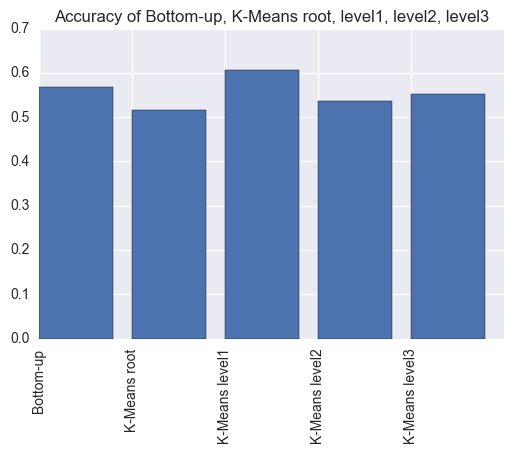

In [45]:
# compare 3 levels and bottom up
x = [1, 2, 3, 4, 5]
accurcy = [0.568681318681, 0.5164835165, 0.607142857143, 0.535714285714, 0.552197802198]
plot_xLabels = ["Bottom-up", "K-Means root", "K-Means level1", "K-Means level2", "K-Means level3"]
plt.clf()
plt.bar( x, accurcy )
plt.xticks(x, plot_xLabels, rotation='vertical')
plt.title("Accuracy of Bottom-up, K-Means root, level1, level2, level3")
plt.show()
